# 1. Importing files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 


## Read the data

In [2]:
day=pd.read_csv("day.csv")

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observations:
    - day dataframe contains 730 rows and 16 columns and has no null values

# Converting numerical variables to categorical variables

In [7]:
def changing(x):
    if x==1:
        return("spring")
    
    elif x==2:
        return("summer")
        
    elif x==3:
        return("fall")
        
    else:
        return("winter")
day['season']=day['season'].apply(changing)

In [8]:
day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [9]:
def changing_weather(x):
    if x==1:
        return("Partly cloudy")
    elif x==2:
        return("Mist")
    elif x==3:
        return("Light Rain + Scattered clouds")
    else:
        return("Snow + Fog")
day['weathersit']=day["weathersit"].apply(changing_weather)

In [10]:
day["weathersit"].value_counts()

Partly cloudy                    463
Mist                             246
Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

In [11]:
def object_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })

day[['mnth']] = day[['mnth']].apply(object_map)

In [12]:
day["mnth"].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [13]:
day.weekday = day.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
day["weekday"].value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [15]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,mon,1,Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,tue,1,Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,wed,1,Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


# Dropping the variables

In [17]:
day=day.drop(["instant","dteday","casual","registered"],axis=1)

## Exploratory Data Analysis:

### Visualising the numerical variables

In [18]:
num_var=['temp','hum','windspeed',"atemp",'cnt']

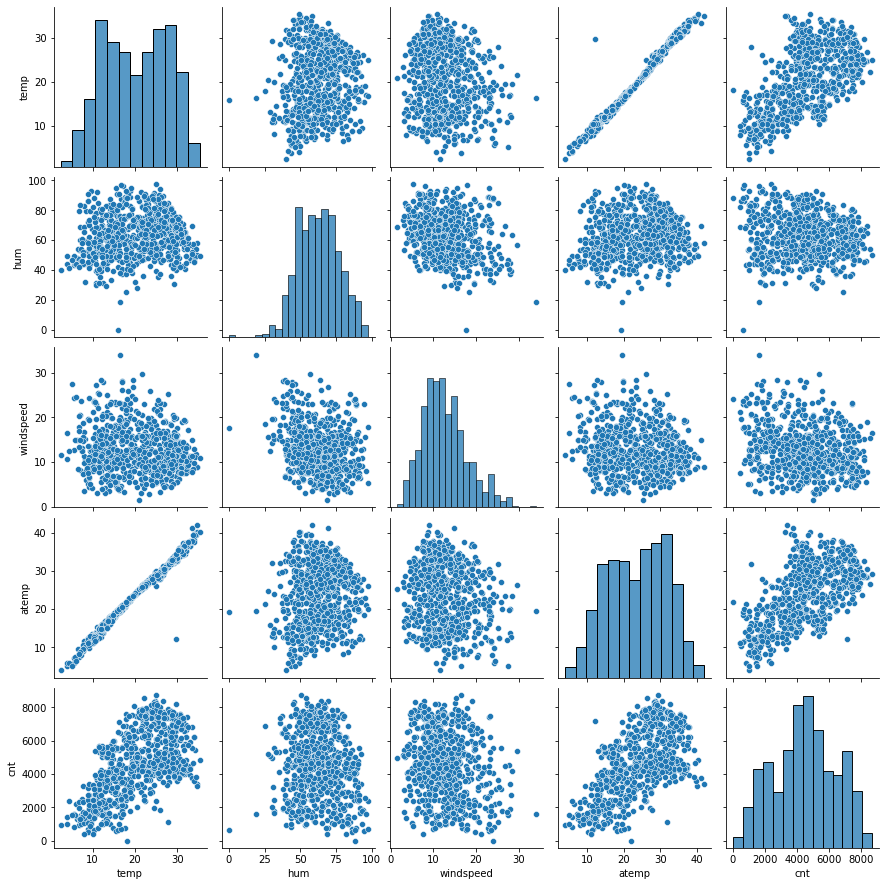

In [19]:
sns.pairplot(day[num_var])
plt.show()

### Visualising the categorical variables

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

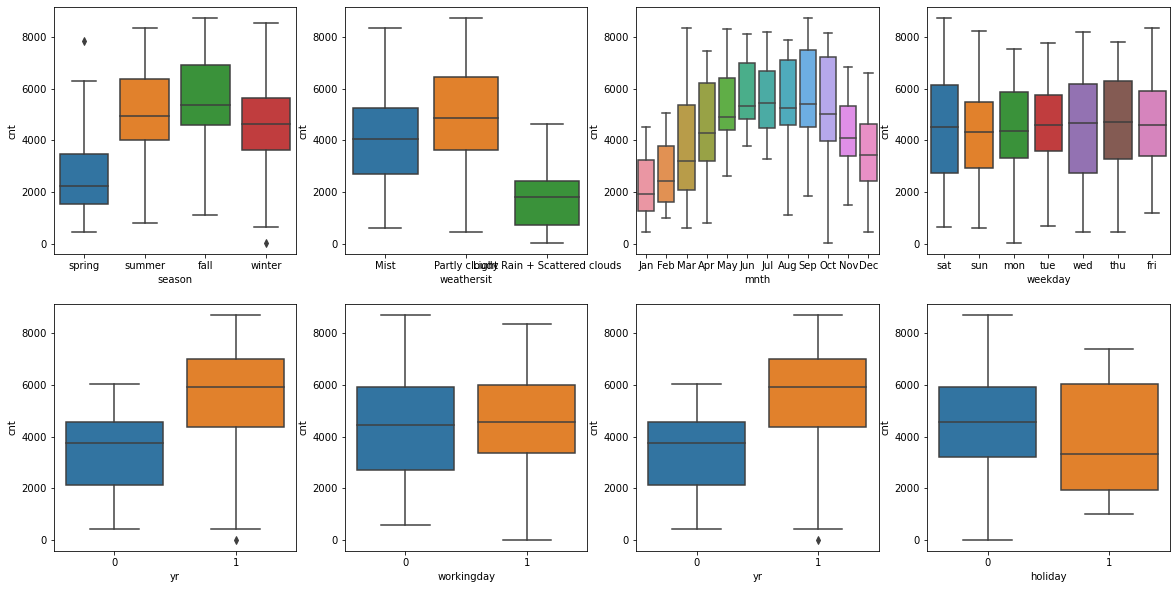

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x="season",y='cnt',data=day)
plt.subplot(2,4,2)
sns.boxplot(x="weathersit",y='cnt',data=day)
plt.subplot(2,4,3)
sns.boxplot(x="mnth",y="cnt",data=day)
plt.subplot(2,4,4)
sns.boxplot(x="weekday",y="cnt",data=day)
plt.subplot(2,4,5)
sns.boxplot(x="yr",y="cnt",data=day)
plt.subplot(2,4,6)
sns.boxplot(x="workingday",y="cnt",data=day)
plt.subplot(2,4,7)
sns.boxplot(x="yr",y="cnt",data=day)
plt.subplot(2,4,8)
sns.boxplot(x="holiday",y="cnt",data=day)


In [21]:
day['season'] = day.season.astype('category')
day['mnth'] = day.mnth.astype('category')
day['weekday'] = day.weekday.astype('category')
day['weathersit'] = day.weathersit.astype('category')


#Creating Dummy variables 

In [22]:
day = pd.get_dummies(day, drop_first=True)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   hum                       730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   cnt                       730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  mnth_Aug                  730 non-null    uint8  
 12  mnth_Dec                  730 non-null    uint8  
 13  mnth_Feb                  730 non-null    uint8  
 14  mnth_Jan  

In [23]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   hum                       730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   cnt                       730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  mnth_Aug                  730 non-null    uint8  
 12  mnth_Dec                  730 non-null    uint8  
 13  mnth_Feb                  730 non-null    uint8  
 14  mnth_Jan  

In [24]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Partly cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1


In [25]:
day.shape

(730, 30)

# 2:preparing the data for modelling

### Splittiing into train and test set:

In [26]:
df_train,df_test=train_test_split(day,train_size=0.7,random_state=100)

In [27]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the features

In [28]:
scaler=MinMaxScaler()
num_vars=['temp',"hum","windspeed",'cnt',"atemp"]
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Partly cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Partly cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.625490
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.484471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step3: Training the model

###  Checking correlation coefficient (Heatmap) 

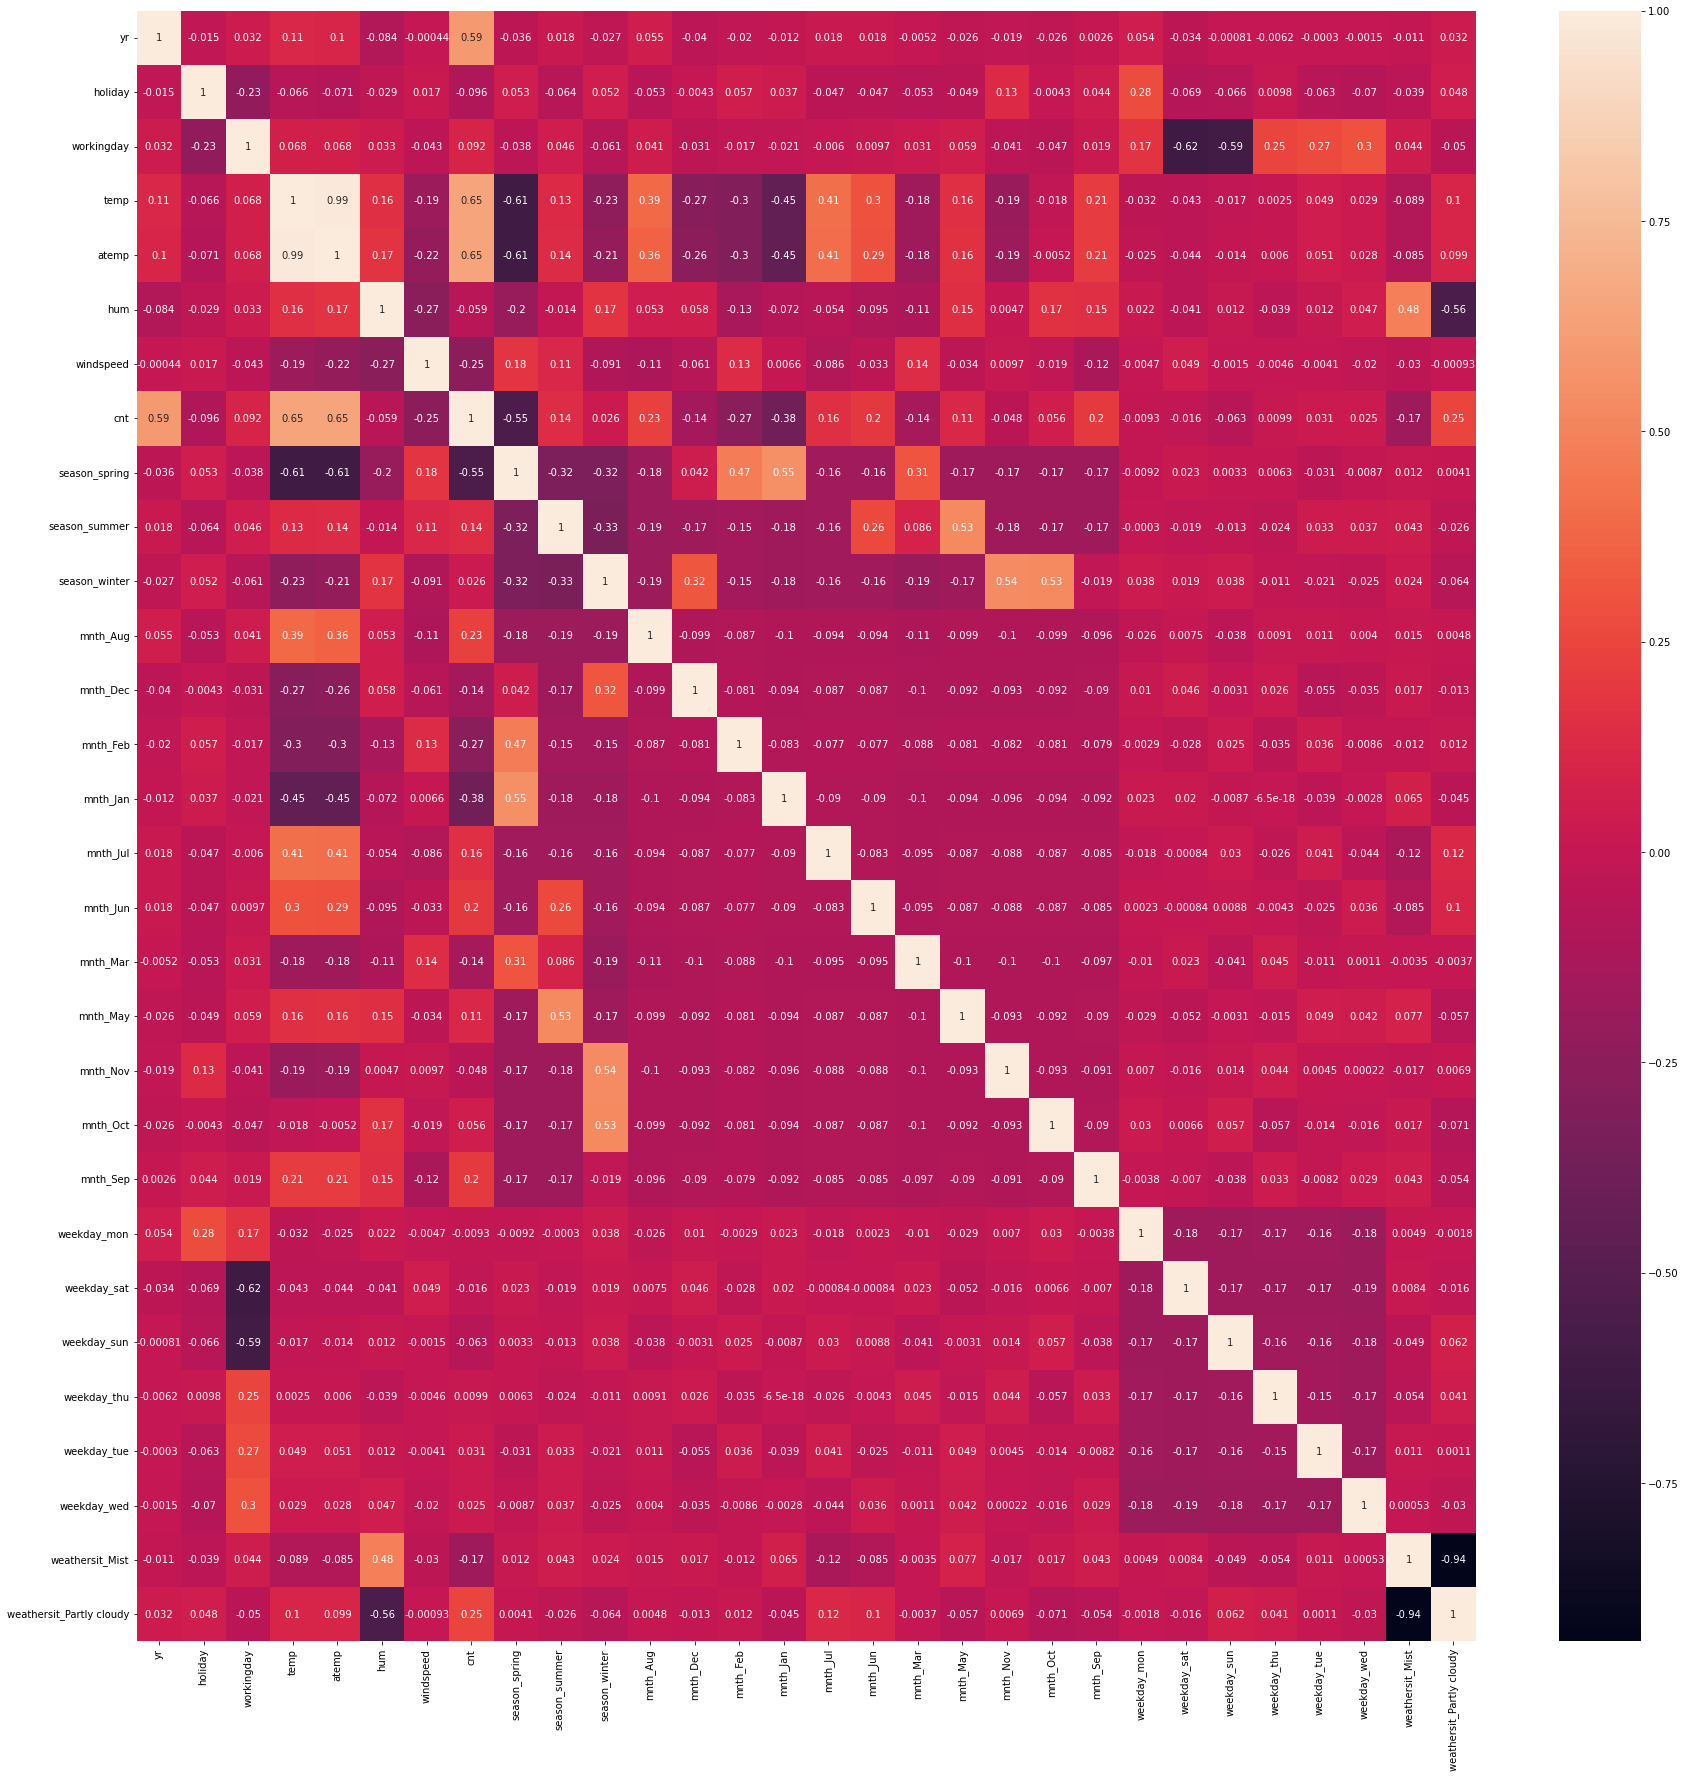

In [31]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

# Buliding the model

In [32]:
y_train=df_train.pop("cnt")
X_train=df_train

In [33]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Mist', 'weathersit_Partly cloudy'],
      dtype='object')

## Selecting the features using RFE

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_Mist', True, 1),
 ('weathersit_Partly cloudy', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_sat', 'weathersit_Mist',
       'weathersit_Partly cloudy'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
X_train_rfe.shape

(510, 15)

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

## Model -1

In [42]:
lm = sm.OLS(y_train,X_train_rfe1).fit()   # Running the linear model
lm.params

const                       0.004429
yr                          0.230527
holiday                    -0.058173
workingday                  0.043335
temp                        0.509619
hum                        -0.156299
windspeed                  -0.186259
season_spring              -0.050897
season_summer               0.050762
season_winter               0.093301
mnth_Jan                   -0.034512
mnth_Jul                   -0.052918
mnth_Sep                    0.081395
weekday_sat                 0.053552
weathersit_Mist             0.191146
weathersit_Partly cloudy    0.247464
dtype: float64

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          4.22e-191
Time:                        19:04:39   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_df = pd.DataFrame()
vif_df['Features'] = X_train.columns
vif_df['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,workingday,127.89
3,temp,66.90
4,atemp,56.03
22,weekday_sat,29.06
23,weekday_sun,27.51
7,season_spring,10.77
28,weathersit_Partly cloudy,10.66
9,season_winter,9.46
27,weathersit_Mist,9.24
8,season_summer,8.29


### temp is insignificant in presence of other variables; can be dropped

In [45]:
X_train_new1 = X_train_rfe1.drop(["temp"], axis = 1)

In [46]:
X_train_new1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_sat', 'weathersit_Mist',
       'weathersit_Partly cloudy'],
      dtype='object')

## Model2

### Rebuilding the model without temp

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [48]:
lm2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [49]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     125.8
Date:                Thu, 04 May 2023   Prob (F-statistic):          7.36e-153
Time:                        19:04:39   Log-Likelihood:                 425.67
No. Observations:                 510   AIC:                            -821.3
Df Residuals:                     495   BIC:                            -757.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [50]:
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new1.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
0,const,133.20
14,weathersit_Partly cloudy,10.09
13,weathersit_Mist,8.86
6,season_spring,2.70
7,season_summer,2.17
8,season_winter,2.02
3,workingday,1.88
4,hum,1.78
12,weekday_sat,1.78
9,mnth_Jan,1.46


### hum is insignificant in presence of other variables; can be dropped

In [51]:
X_train_new2 = X_train_new1.drop(["hum"], axis = 1)

In [52]:
X_train_new2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep',
       'weekday_sat', 'weathersit_Mist', 'weathersit_Partly cloudy'],
      dtype='object')

## Model-3

### Rebuilding the model without hum

In [53]:
X_train_lm = sm.add_constant(X_train_new2)

In [54]:
lm3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Thu, 04 May 2023   Prob (F-statistic):          6.44e-154
Time:                        19:04:39   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new1.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
0,const,133.20
14,weathersit_Partly cloudy,10.09
13,weathersit_Mist,8.86
6,season_spring,2.70
7,season_summer,2.17
8,season_winter,2.02
3,workingday,1.88
4,hum,1.78
12,weekday_sat,1.78
9,mnth_Jan,1.46


### mnth_Jul is insignificant in presence of other variables; can be dropped

In [56]:
X_train_new3 = X_train_new2.drop(['mnth_Jul'], axis=1)

In [57]:
X_train_new3.columns

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Sep', 'weekday_sat',
       'weathersit_Mist', 'weathersit_Partly cloudy'],
      dtype='object')

## Model-4

### Rebuilding the model without mnth_Jul

In [58]:
X_train_lm = sm.add_constant(X_train_new3)

In [59]:
lm4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Thu, 04 May 2023   Prob (F-statistic):          5.73e-155
Time:                        19:04:39   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [60]:
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new3.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
0,const,52.48
12,weathersit_Partly cloudy,8.64
11,weathersit_Mist,8.60
5,season_spring,2.19
3,workingday,1.87
10,weekday_sat,1.77
6,season_summer,1.69
7,season_winter,1.59
8,mnth_Jan,1.46
9,mnth_Sep,1.17


### season_winter is insignificant in presence of other variables; can be dropped

In [61]:
X_train_new4 = X_train_new3.drop(['season_winter'], axis=1)

## Model-5

### Rebuilding the model without season_winter 

In [62]:
X_train_lm = sm.add_constant(X_train_new4)

In [63]:
lm5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     149.9
Date:                Thu, 04 May 2023   Prob (F-statistic):          3.67e-150
Time:                        19:04:40   Log-Likelihood:                 411.49
No. Observations:                 510   AIC:                            -799.0
Df Residuals:                     498   BIC:                            -748.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new4.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
0,const,47.88
10,weathersit_Mist,8.56
11,weathersit_Partly cloudy,8.55
3,workingday,1.87
9,weekday_sat,1.77
5,season_spring,1.72
7,mnth_Jan,1.46
6,season_summer,1.23
2,holiday,1.16
4,windspeed,1.10


### weathersit_Mist is insignificant in presence of other variables; can be dropped

In [65]:
X_train_new5 = X_train_new4.drop(['weathersit_Mist'], axis=1)

In [66]:
X_train_new5.columns

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'mnth_Jan', 'mnth_Sep', 'weekday_sat',
       'weathersit_Partly cloudy'],
      dtype='object')

## Model6

### Rebuilding the model without weathersit_Mist

In [67]:
X_train_lm = sm.add_constant(X_train_new5)

In [68]:
lm6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     143.0
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.64e-139
Time:                        19:04:40   Log-Likelihood:                 383.65
No. Observations:                 510   AIC:                            -745.3
Df Residuals:                     499   BIC:                            -698.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
vif_df = pd.DataFrame()
vif_df['Features'] = X_train_new5.columns
vif_df['VIF'] = [variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
0,const,14.42
3,workingday,1.86
9,weekday_sat,1.77
5,season_spring,1.72
7,mnth_Jan,1.46
6,season_summer,1.22
2,holiday,1.16
8,mnth_Sep,1.10
4,windspeed,1.09
10,weathersit_Partly cloudy,1.02


In [70]:
X_train_new = X_train_new5.drop(['const'], axis=1)

In [71]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.93
2,workingday,3.34
9,weathersit_Partly cloudy,2.30
4,season_spring,2.25
0,yr,1.91
6,mnth_Jan,1.59
5,season_summer,1.58
8,weekday_sat,1.56
7,mnth_Sep,1.16
1,holiday,1.12


## Observation: 
    - Features that contain lesser VIF i.e, less than 5 and p_value is less than 0.05 are 
         windspeed, season_spring, weathersit_Partly_cloudy, yr, season_summer, mnth_Jan, mnth_Nov, mnth_Sep, mnth_Dec, 
         holiday.
    - R square value is 0.763
    - Adj R square value is 0.759
    - Their is no multicollinearity between the variables.

# 4: Residual analysis and preditions

In [72]:
y_train_pred=lm6.predict(X_train_new5)

C:\Users\aravind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

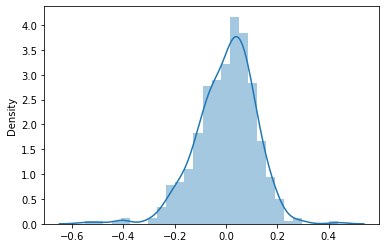

In [73]:
res=y_train-y_train_pred
sns.distplot(res)

## Observation:
          We conclude that errors are normally distributed.

# 5: Prediction and evaluating on the test set

In [74]:
num_vars=['temp',"hum","windspeed",'cnt',"atemp"]
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [75]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Partly cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,1


In [76]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Partly cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.654545
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.476601
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
y_test=df_test.pop("cnt")
X_test=df_test

In [78]:
X_test_new=X_test[X_train_rfe.columns]

In [86]:
X_test_new.shape

(220, 16)

In [87]:
X_test_new.describe()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_sat,weathersit_Mist,weathersit_Partly cloudy
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.077273,0.104545,0.086364,0.118182,0.318182,0.654545
std,0.0,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.267633,0.306665,0.281541,0.323559,0.466833,0.476601
min,1.0,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.0,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
# add a constant
X_test_new=sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_sat,weathersit_Mist,weathersit_Partly cloudy
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,1
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1


In [81]:
X_test=X_test_new.drop(['temp','hum',"mnth_Jul","season_winter","weathersit_Mist"],axis=1)

In [82]:
y_pred=lm6.predict(X_test)

In [83]:
# Evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred)

0.702997444695665

In [84]:
r2_score_test = r2_score(y_test, y_pred)
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2_score_test)*(n-1)/(n-p-1)
adjusted_r2

0.6872905787901473

## Model evalutaion

Text(0, 0.5, 'y_pred')

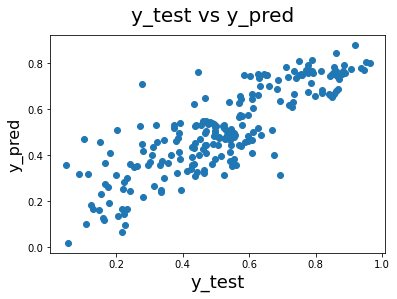

In [85]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

## Final Observations:
          Train R^2 :0.763
          Train Adjusted R^2 :0.759
          Test R^2 :0.7695009587445075
          Test Adjusted R^2 :0.7573111056011882
This seems to be a really good model that can very well 'Generalize' various datasets.

## As per our final Model, the top 3 predictor variables that influences the bike booking are:
        -Year (yr) - coefficient value of 0.2503 
        -weathersit_Partly cloud - coefficient value of 0.1053
        -mnth_Sep -coefficient value of 0.0608